In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/Cost_of_Living_Index_2022.csv")
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


In [4]:
df.shape

(139, 8)

In [5]:
df.iloc[0]

,0
Rank,1
Country,Afghanistan
Cost of Living Index,20.37
Rent Index,2.72
Cost of Living Plus Rent Index,12.09
Groceries Index,14.92
Restaurant Price Index,12.41
Local Purchasing Power Index,23.04


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    int64  
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB


In [7]:
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,70.000000,50.188633,19.291511,35.705324,46.637842,43.444892,46.426259
std,40.269923,20.860222,15.317726,17.542523,20.952229,24.885969,26.921840
min,1.000000,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,35.500000,34.715000,9.515000,23.310000,31.200000,25.290000,27.040000
50%,70.000000,44.680000,13.930000,31.260000,40.220000,34.560000,37.220000
75%,104.500000,62.580000,25.070000,44.865000,56.590000,54.925000,66.105000
max,139.000000,146.040000,98.580000,123.800000,148.660000,159.170000,118.440000


**EDA**

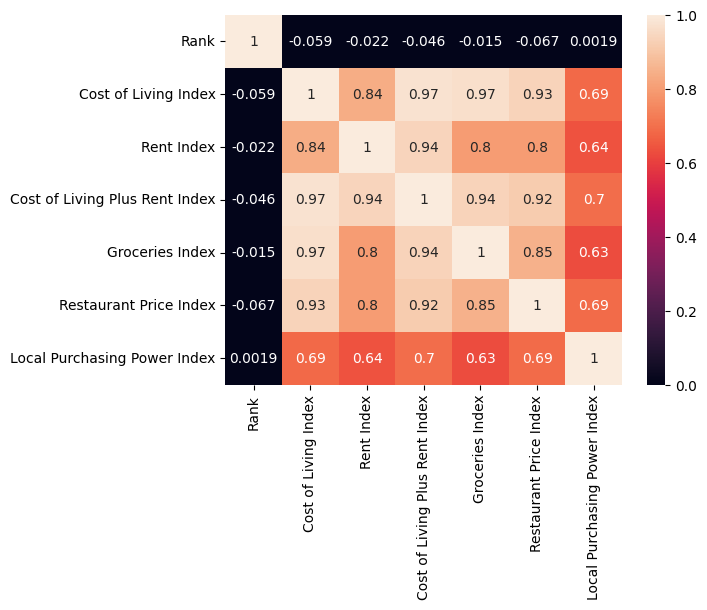

In [8]:
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), vmin=0.0, annot=True)
plt.show()

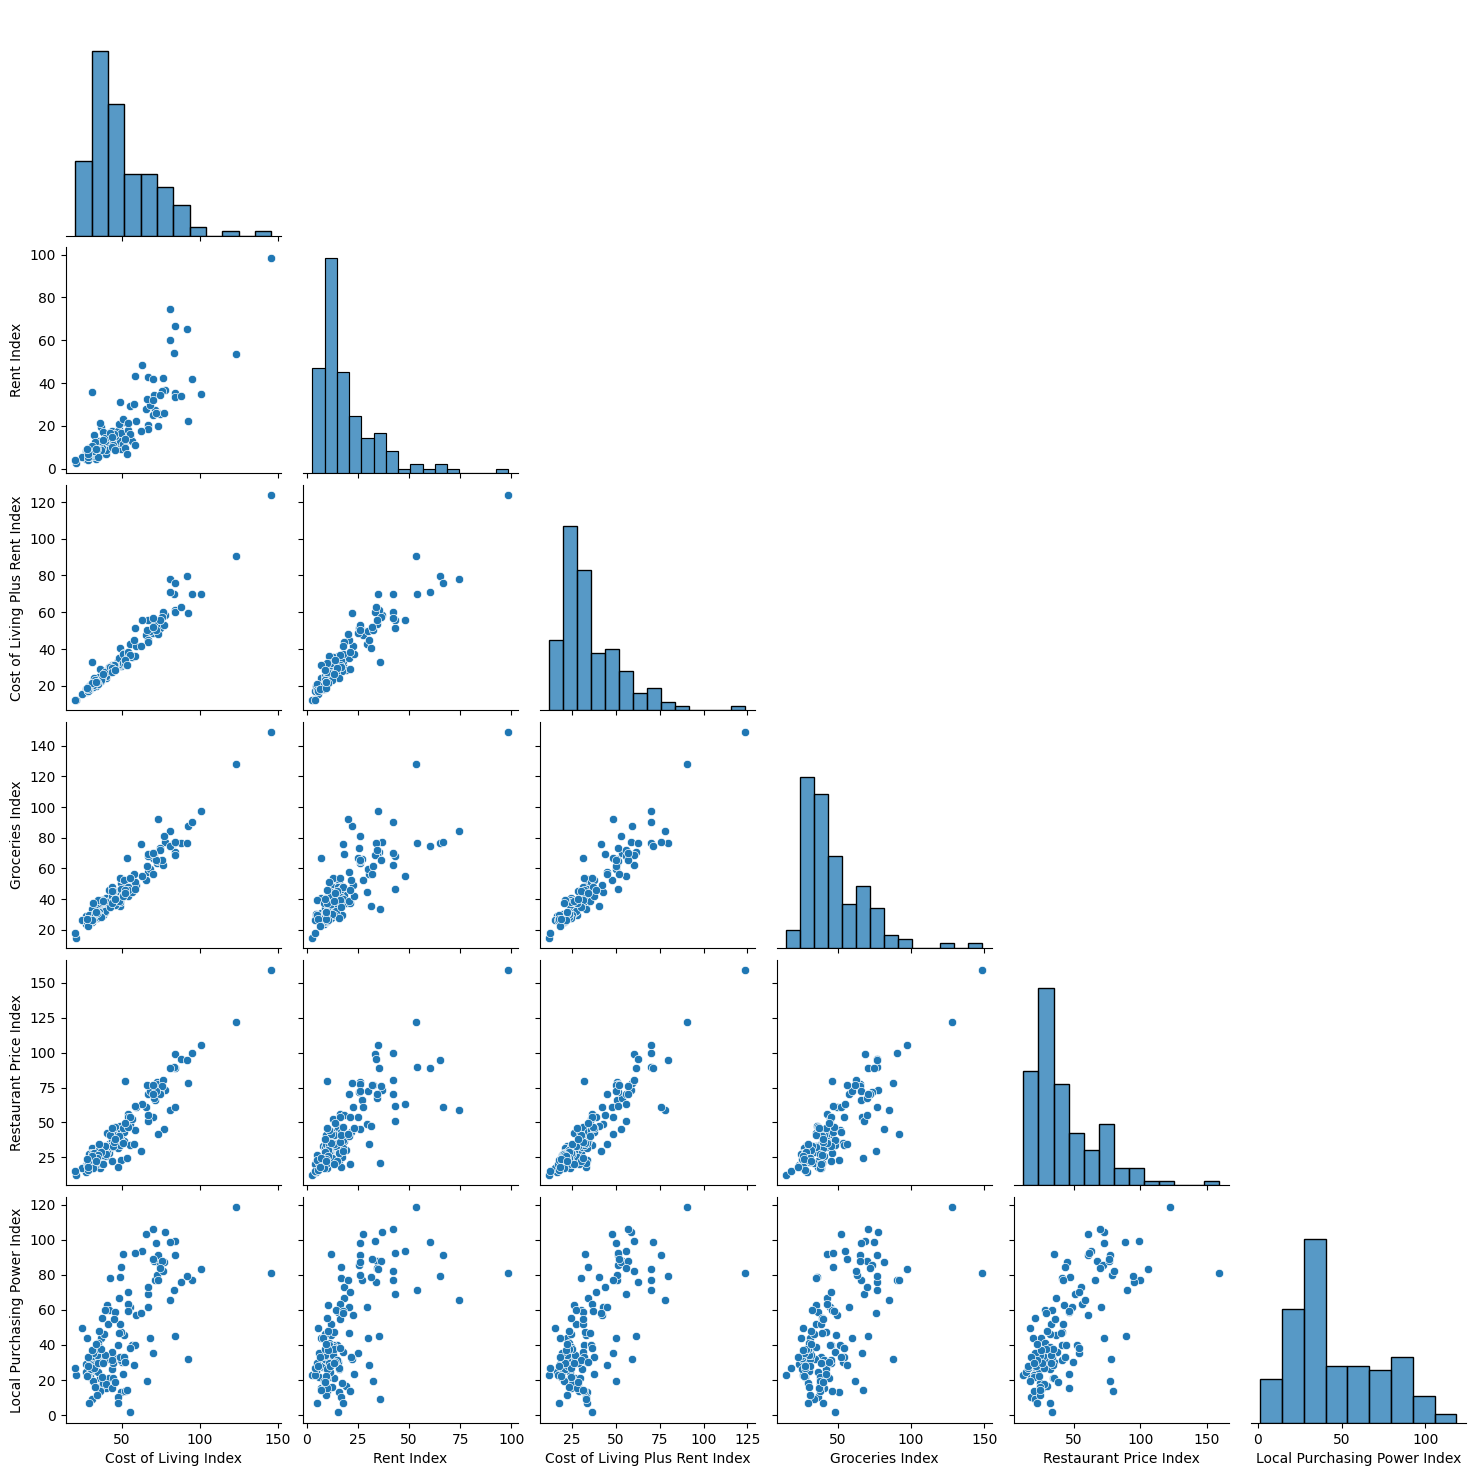

In [9]:
sns.pairplot(df.drop('Rank',axis=1),corner =True  )

**Lets break it down**

The diagonal graphs show a right skewed histogram. This is basically the univariate analysis of the features.This tells us that the central tendencies of the cost of living is towards the lower side.
We see a strong correlation between the cost of living,rent and cost of living plus rent index. So we can drop two of them.
Overall , all of the features have a positive correlation with each other, and that is to be expected. As all of them give in a way how pricey it is to live in the country.(except of course the Local Purchase Index)
The local purchase index shows an irregularity.It has an positive correlation, even though the local purchasing power of a country is proportional to the amount of goods you can buy with a typical salary.

In [10]:
data = df.drop(labels=['Cost of Living Index','Rent Index'],axis=1)

In [11]:
data.head

<bound method NDFrame.head of      Rank      Country  Cost of Living Plus Rent Index  Groceries Index  \
0       1  Afghanistan                           12.09            14.92   
1       2      Albania                           22.83            29.32   
2       3      Algeria                           16.43            28.82   
3       4    Argentina                           22.04            28.17   
4       5      Armenia                           23.45            27.59   
..    ...          ...                             ...              ...   
134   135    Venezuela                           27.63            37.34   
135   136      Vietnam                           26.11            38.70   
136   137        Yemen                           31.38            67.12   
137   138       Zambia                           21.90            31.53   
138   139     Zimbabwe                           28.37            39.88   

     Restaurant Price Index  Local Purchasing Power Index  
0                     12.41                         23.04  
1                     25.82                         30.19  
2                     14.48                         24.63  
3                     33.32                         30.72  
4                     30.55                         28.86  
..                      ...                           ...  
134                   46.23                         15.41  
135                   19.98                         29.38  
136                   24.74                         14.41  
137                   22.46                         40.33  
138                   38.13                         19.07  

[139 rows x 6 columns]>

Let find the most expensive countries to live in

In [12]:
data['total_price_index'] = data[['Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index']].sum(axis=1)/3

In [14]:
expensive = data.sort_values(by='total_price_index',ascending=False).head(20)
expensive

,Rank,Country,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,total_price_index
15,16,Bermuda,123.80,148.66,159.17,81.07,143.876667
119,120,Switzerland,90.62,128.13,122.09,118.44,113.613333
90,91,Norway,69.86,97.31,105.49,83.11,90.886667
51,52,Iceland,70.05,90.22,99.42,77.06,86.563333
62,63,Jersey,79.51,76.88,94.65,79.14,83.680000
47,48,Guernsey,69.73,76.76,89.98,71.57,78.823333
57,58,Israel,62.69,76.72,95.31,75.58,78.240000
72,73,Luxembourg,70.93,74.75,88.79,98.84,78.156667
32,33,Denmark,60.26,68.60,98.75,99.45,75.870000
11,12,Barbados,59.38,87.81,78.18,32.08,75.123333


<Axes: xlabel='total_price_index', ylabel='Country'>

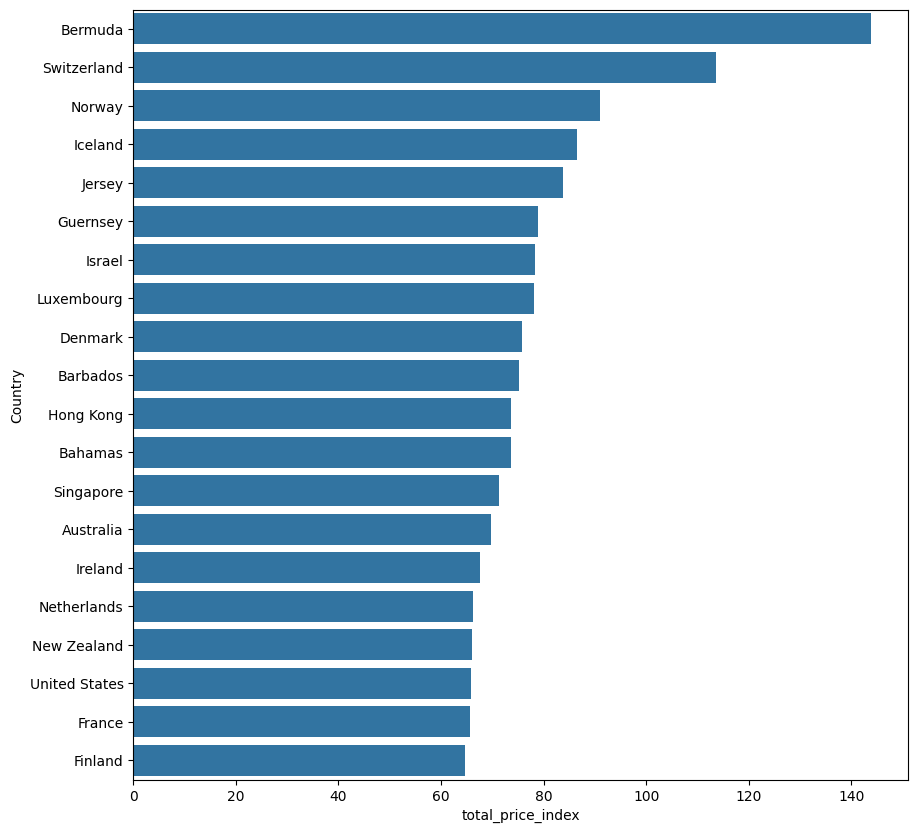

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(x=expensive['total_price_index'],y=expensive['Country'])

<Axes: xlabel='Local Purchasing Power Index', ylabel='Country'>

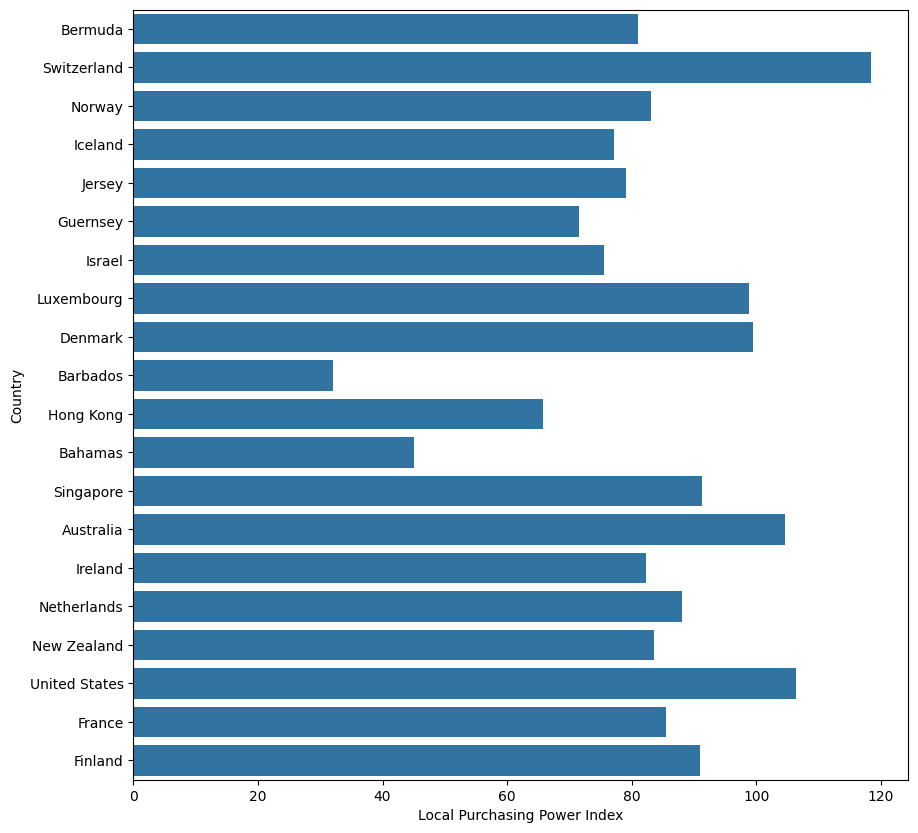

In [16]:
plt.figure(figsize=(10,10))
sns.barplot(x=expensive['Local Purchasing Power Index'],y=expensive['Country'])

Among the most expensive countries to live in, Barbados and Bahamas are the ones with a lower Local Purchasing Power

**Lets find the cheapest countries to live in**

In [17]:
cheap = data.sort_values(by='total_price_index').head(20)
cheap

,Rank,Country,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,total_price_index
0,1,Afghanistan,12.09,14.92,12.41,23.04,13.140000
92,93,Pakistan,12.42,17.81,15.54,26.63,15.256667
126,127,Turkey,18.15,22.64,18.40,32.88,19.730000
52,53,India,15.47,26.43,17.56,49.72,19.820000
2,3,Algeria,16.43,28.82,14.48,24.63,19.910000
125,126,Tunisia,17.30,27.36,15.96,27.83,20.206667
26,27,Colombia,18.03,23.47,19.44,28.85,20.313333
66,67,Kosovo (Disputed Territory),18.14,24.84,19.53,43.86,20.836667
84,85,Nepal,16.89,26.45,20.41,22.96,21.250000
89,90,North Macedonia,19.51,26.95,21.02,35.44,22.493333


<Axes: xlabel='total_price_index', ylabel='Country'>

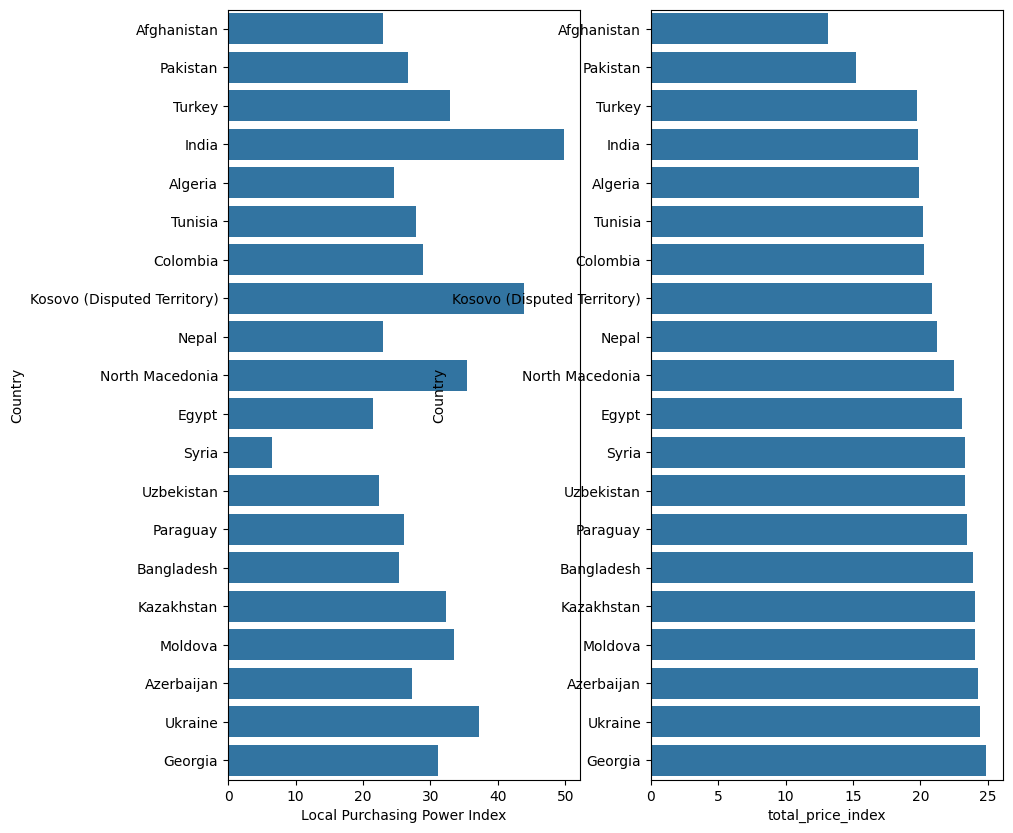

In [18]:
fig,axes = plt.subplots(1,2,figsize=(10,10))
sns.barplot(x=cheap['Local Purchasing Power Index'],y=cheap['Country'],ax=axes[0])
sns.barplot(x=cheap['total_price_index'],y=cheap['Country'],ax=axes[1])

India has the highest LPP index among the cheapest countries to live in. It means that for a typical salary in India, we get 50% less goods than New York City, but it is still better than the other countries in the list.

**Now, we find the countris with the highest purchasing powers**

In [19]:
purchase = data.sort_values(by='Local Purchasing Power Index',ascending =False).head(20)
purchase

,Rank,Country,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,total_price_index
119,120,Switzerland,90.62,128.13,122.09,118.44,113.613333
131,132,United States,56.98,70.37,70.07,106.34,65.806667
5,6,Australia,58.57,77.44,72.95,104.63,69.653333
43,44,Germany,47.78,52.31,60.91,103.08,53.666667
32,33,Denmark,60.26,68.60,98.75,99.45,75.870000
72,73,Luxembourg,70.93,74.75,88.79,98.84,78.156667
118,119,Sweden,50.23,65.78,72.61,98.14,62.873333
101,102,Qatar,55.96,54.97,63.01,93.67,57.980000
129,130,United Arab Emirates,51.28,46.67,61.53,92.17,53.160000
105,106,Saudi Arabia,32.25,42.57,35.50,91.85,36.773333


<Axes: xlabel='Local Purchasing Power Index', ylabel='Country'>

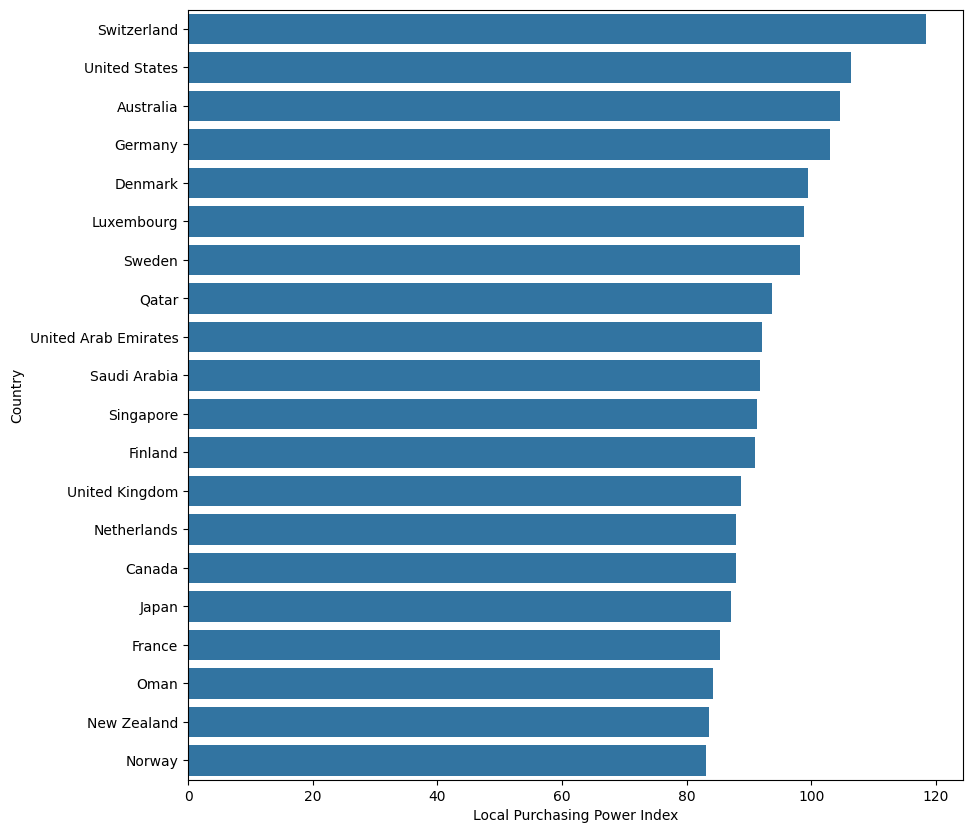

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(x=purchase['Local Purchasing Power Index'],y=purchase['Country'])

Switzerland and USA have the highest local purchasing powe

**Model Setup**

In [23]:
#importing matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#set plot features
sns.set(style = 'darkgrid', color_codes = True)
def setPlt():
    f, ax = plt.subplots(figsize = (13,9))
    sns.despine(f, left = True, bottom = True)

/tmp/ipython-input-2817990753.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist = sns.distplot(df['Cost of Living Index'])


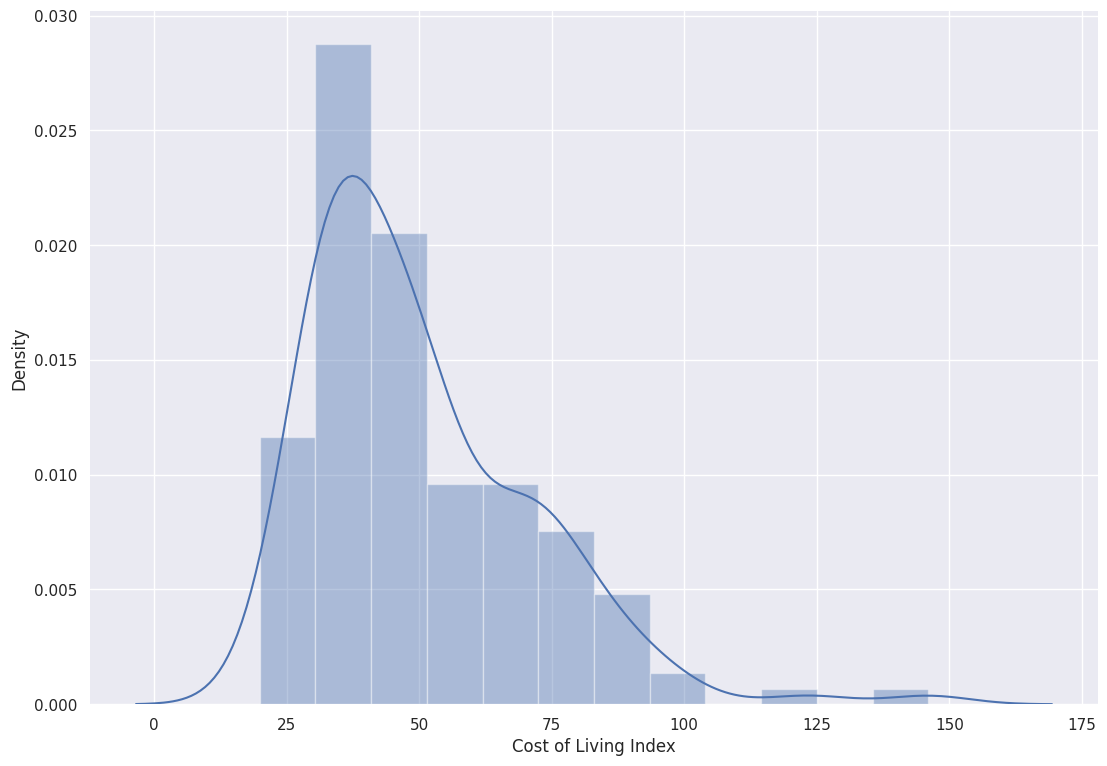

In [24]:
#create plot, a histogram of cost of living index
setPlt()
hist = sns.distplot(df['Cost of Living Index'])

/tmp/ipython-input-3362647589.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist = sns.distplot(df['Rent Index'])


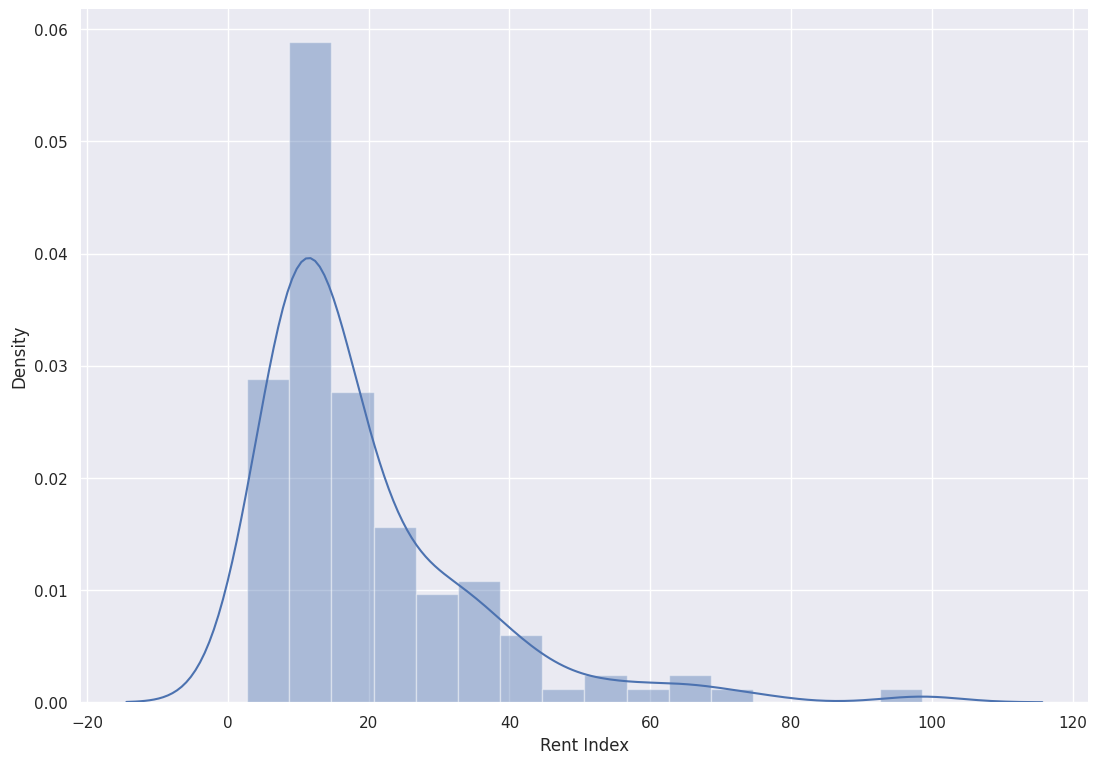

In [25]:
#create plot, a histogram of Rent Index
setPlt()
hist = sns.distplot(df['Rent Index'])

/tmp/ipython-input-2748920954.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist = sns.distplot(df['Cost of Living Plus Rent Index'])


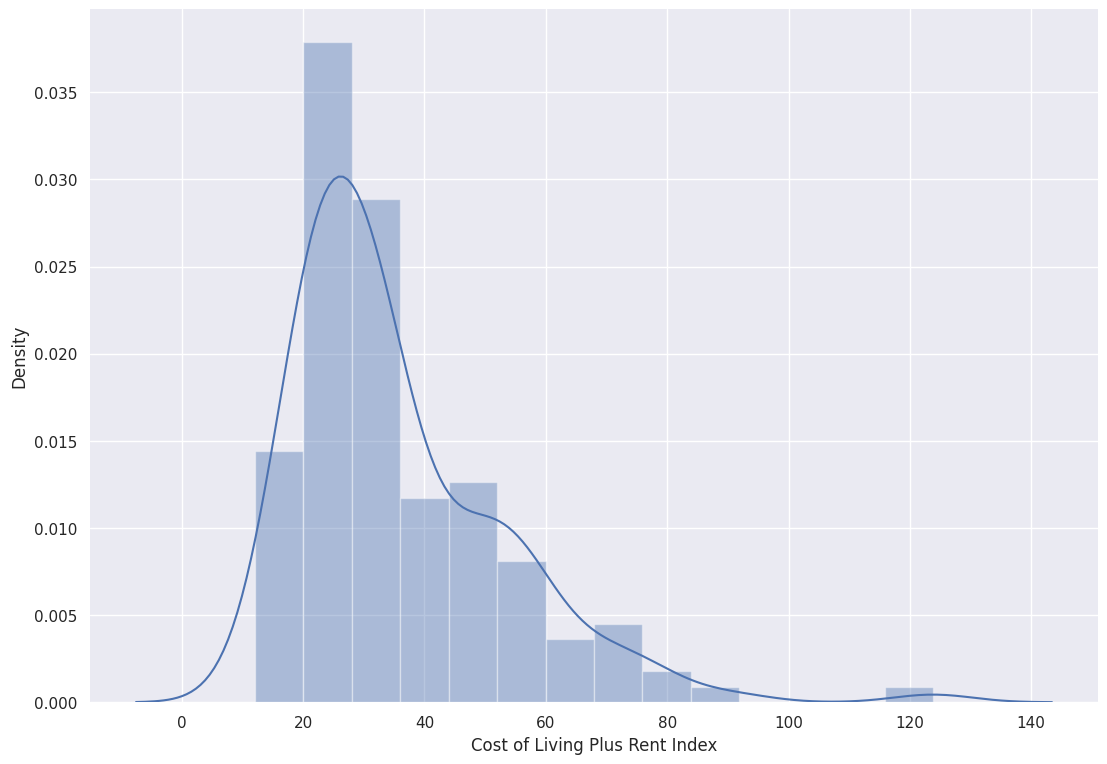

In [26]:
#create plot, a histogram of Cost of Living Plus Rent Index
setPlt()
hist = sns.distplot(df['Cost of Living Plus Rent Index'])

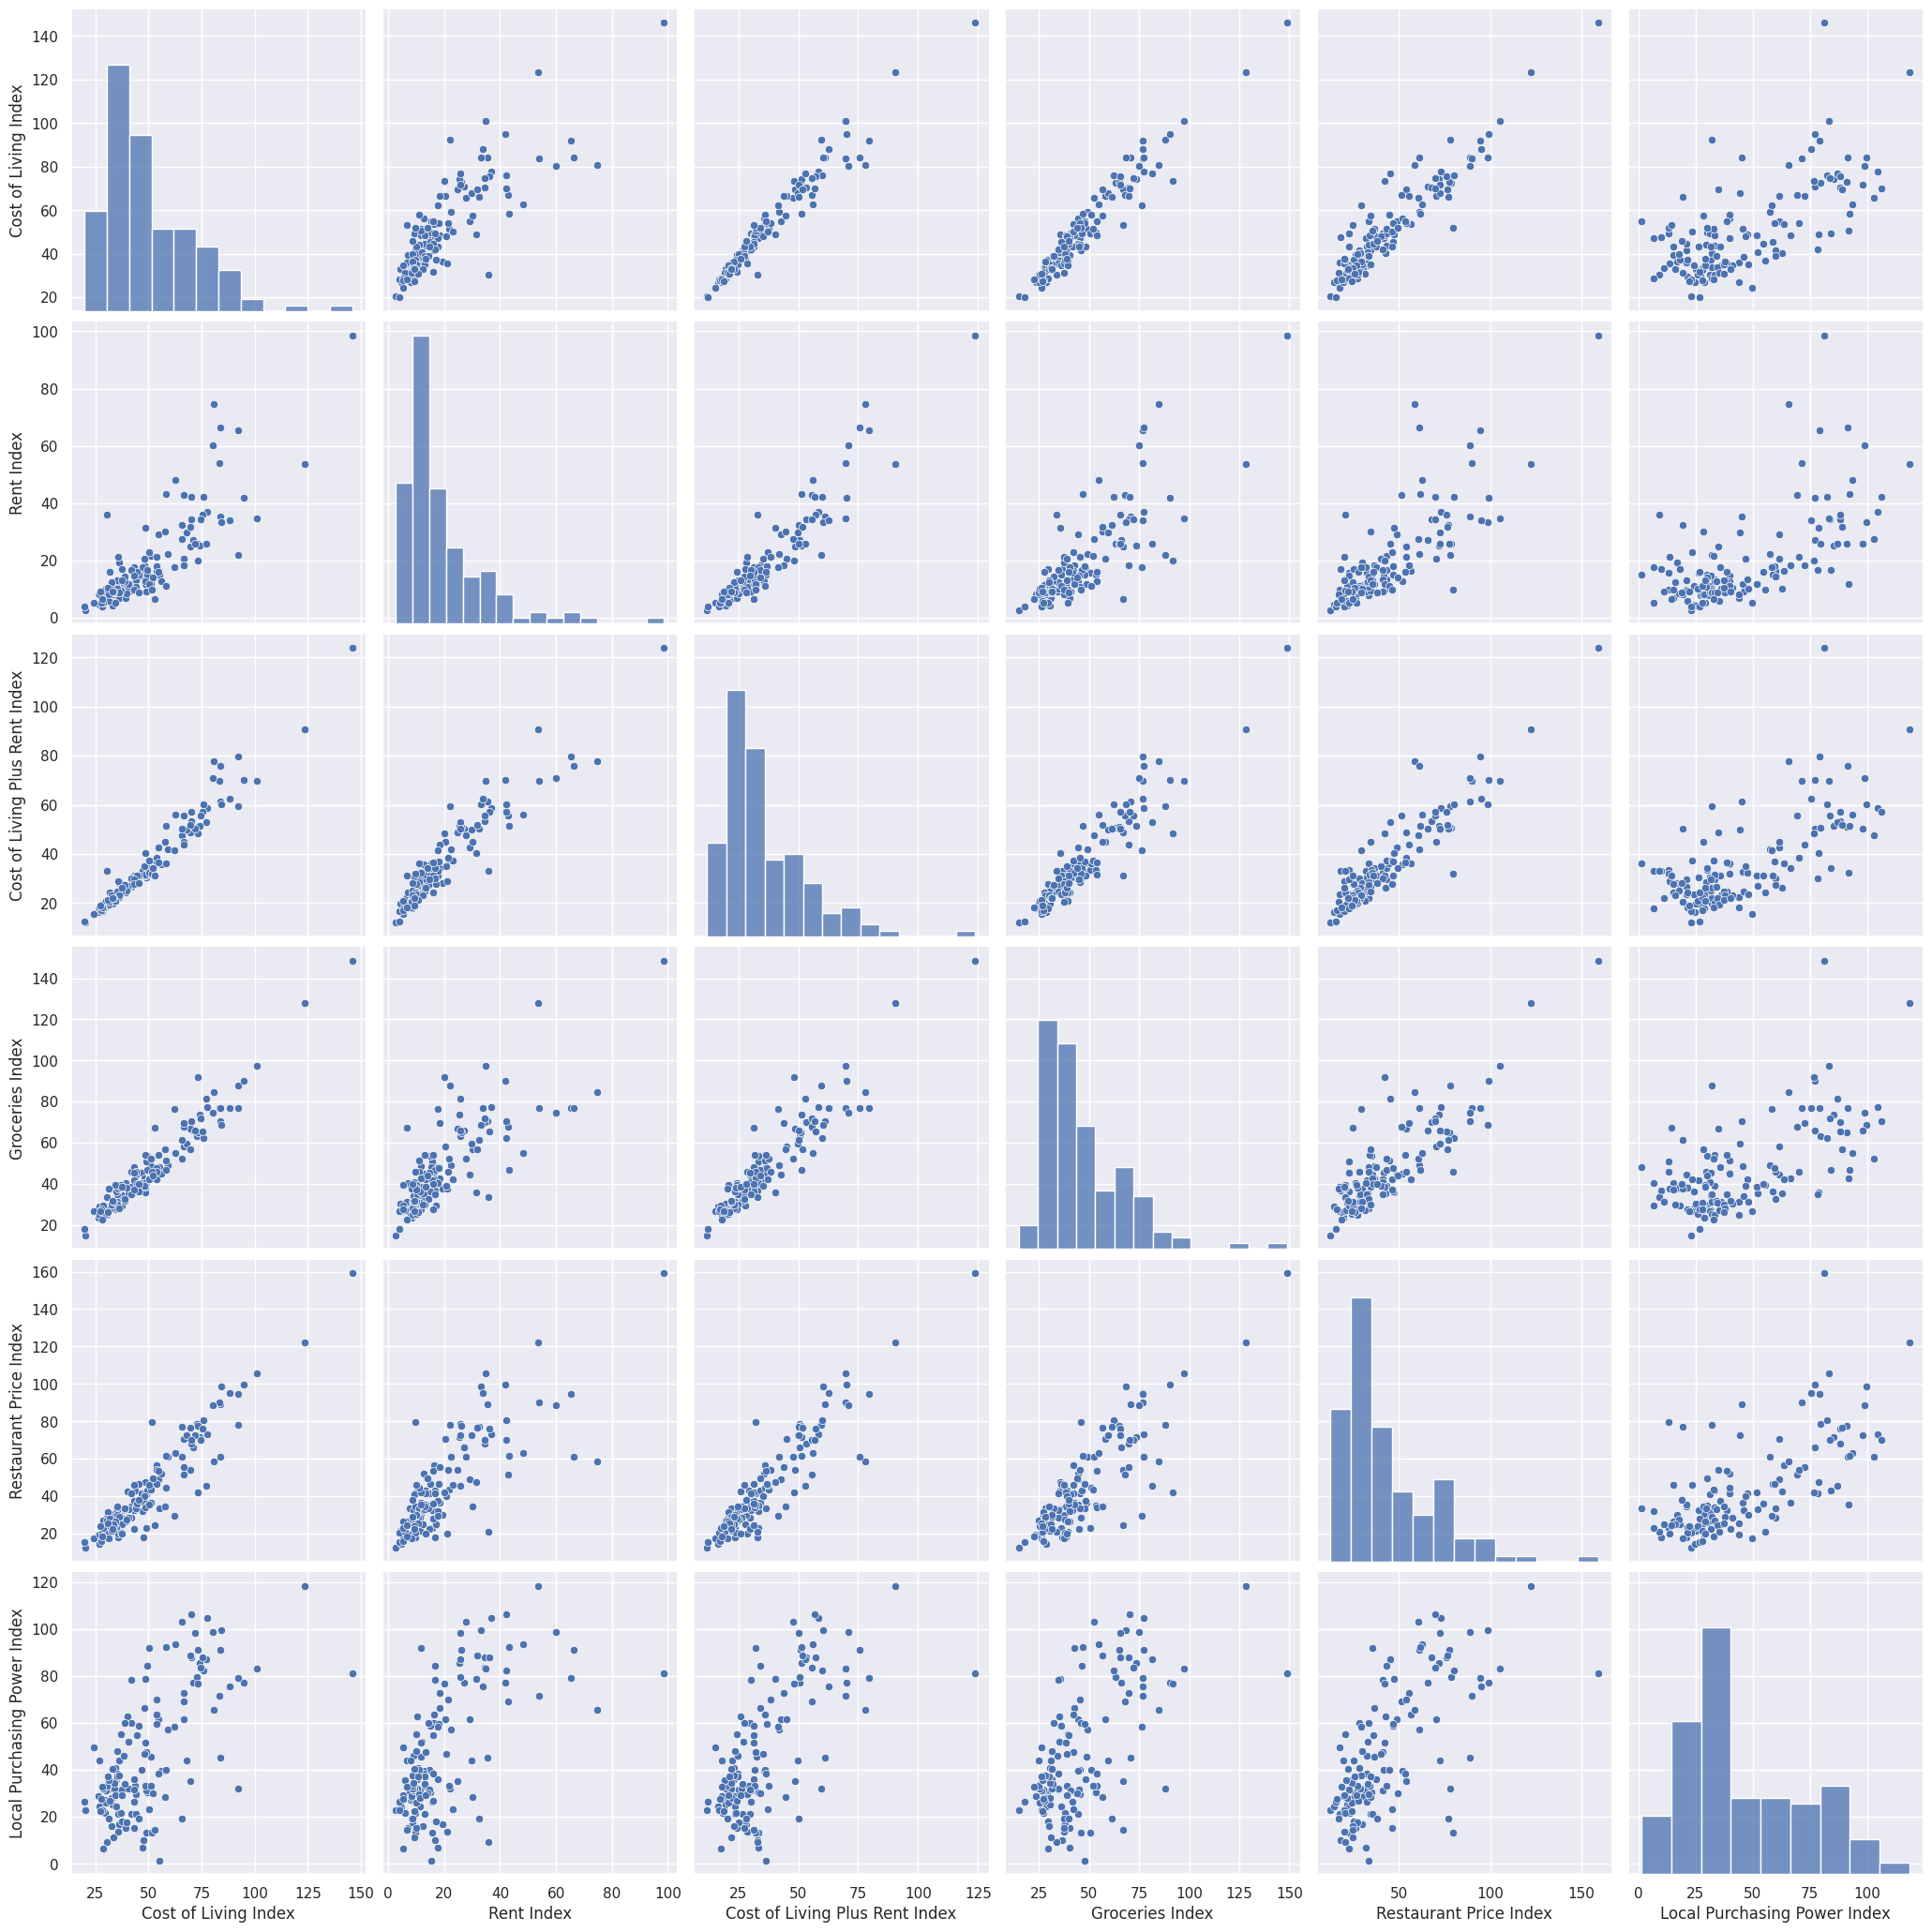

In [27]:
#plot all columns against each other except country
import seaborn as sns; sns.set()

sns.pairplot(data=df,
             x_vars=['Cost of Living Index','Rent Index','Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index','Local Purchasing Power Index'],
             y_vars= ['Cost of Living Index','Rent Index','Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index','Local Purchasing Power Index'],
              height=3.5)

**Linear Regression Model**

In [28]:
#linear regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
#drop country to keep numerical data and Cost of Living Plus Rent Index to set Cost of Living Plus Rent Index as Y
X = df.drop(columns=['Country','Cost of Living Plus Rent Index'])
y = df['Cost of Living Plus Rent Index']

print (X,y)

model = LinearRegression()
model.fit(X, y)

def mse(model, X, y):
    y_hat = model.predict(X)
    err = np.mean((y - y_hat)**2)
    return err

print('R^2:', model.score(X, y), 'MSE:', mse(model, X, y))

     Rank  Cost of Living Index  Rent Index  Groceries Index  \
0       1                 20.37        2.72            14.92   
1       2                 35.50        8.47            29.32   
2       3                 26.87        4.59            28.82   
3       4                 34.69        7.71            28.17   
4       5                 33.89       11.61            27.59   
..    ...                   ...         ...              ...   
134   135                 43.20        9.99            37.34   
135   136                 37.48       13.22            38.70   
136   137                 53.14        6.71            67.12   
137   138                 33.04        9.26            31.53   
138   139                 45.68        8.75            39.88   

     Restaurant Price Index  Local Purchasing Power Index  
0                     12.41                         23.04  
1                     25.82                         30.19  
2                     14.48                        

In [29]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=2)

res = cross_val_score(model, X, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(model, X, y, cv=kf)
cv_r2 = res.mean()
print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)

c-v R^2: 0.9999999351819034 c-v MSE: 2.0131154334029176e-05


In [30]:
#linear regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

#drop country to keep numerical data and Cost of Living Plus Rent Index to set Cost of Living Plus Rent Index as Y
X = df.drop(columns=['Country','Groceries Index'])
y = df['Groceries Index']

print (X,y)

model = LinearRegression()
model.fit(X, y)

def mse(model, X, y):
    y_hat = model.predict(X)
    err = np.mean((y - y_hat)**2)
    return err

print('R^2:', model.score(X, y), 'MSE:', mse(model, X, y))

     Rank  Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0       1                 20.37        2.72                           12.09   
1       2                 35.50        8.47                           22.83   
2       3                 26.87        4.59                           16.43   
3       4                 34.69        7.71                           22.04   
4       5                 33.89       11.61                           23.45   
..    ...                   ...         ...                             ...   
134   135                 43.20        9.99                           27.63   
135   136                 37.48       13.22                           26.11   
136   137                 53.14        6.71                           31.38   
137   138                 33.04        9.26                           21.90   
138   139                 45.68        8.75                           28.37   

     Restaurant Price Index  Local Purchasing Power

In [31]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=2)

res = cross_val_score(model, X, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(model, X, y, cv=kf)
cv_r2 = res.mean()
print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)

c-v R^2: 0.9153462572990734 c-v MSE: 35.85661376548152


Results: I found a relatively high R^2 value for both linear regressions. I first look into Cost of Living Plus Rent Index compared to the other indices and found an R^2 of 0.9999. This was very high so I created a regression model looking into groceries index as the dependent variable. This gave a slightly lower R^2 value but still was above 0.9. The MSE was also slightly higher. I believe this to be due to the correlation of the indices. The Cost of Living Plus Rent Index is similar to two other indices measured separately. Grocerices is further separated but still highly correlated to the other indices

**Decision Tree Model**

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import plotnine as pn
import matplotlib.pyplot as plt
import graphviz
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn import metrics

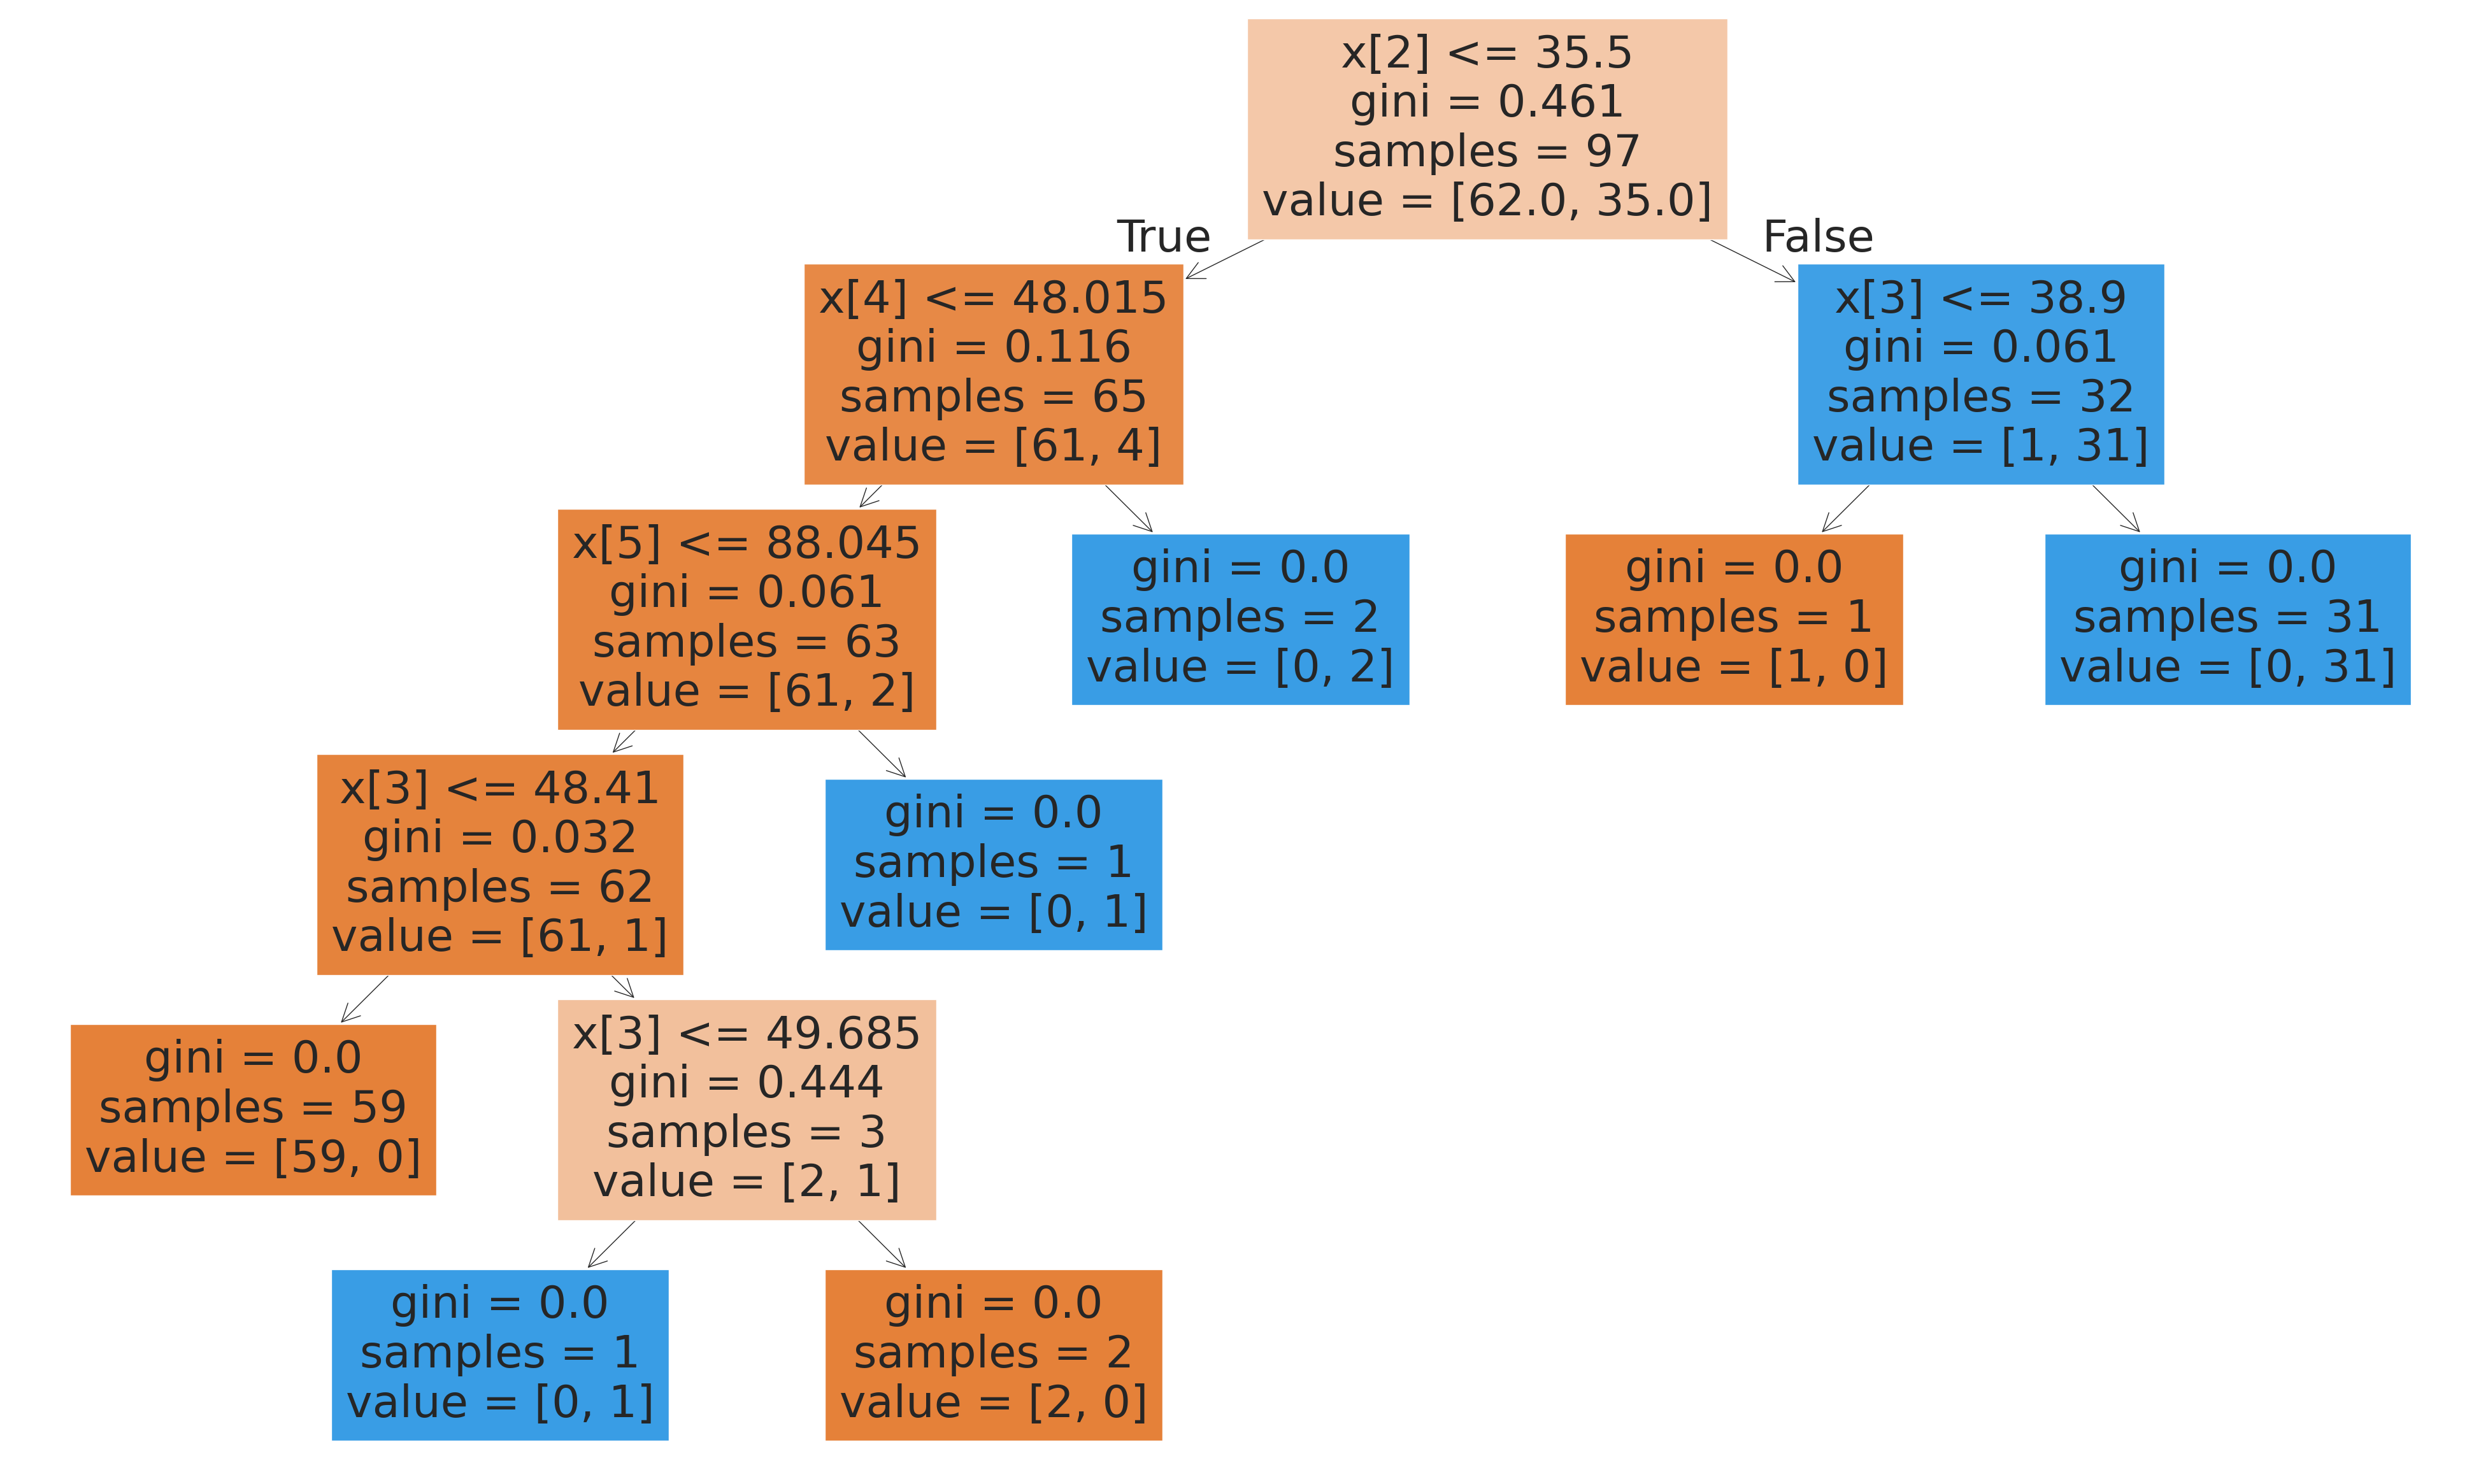

In [33]:
X = df.drop(columns=['Country','Cost of Living Index'])
y = df['Cost of Living Index'].apply(lambda y_data: 1 if y_data>=50 else 0) #used 50 to represent mean of cost of living index

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model =Pipeline([
    ('tree', DecisionTreeClassifier())
])
model.fit(X_train, y_train)

# Visualize
fig = plt.figure(figsize=(50,30))
annotations = plot_tree(model['tree'], filled=True)

In [34]:
# Get accuracy
print(f'Train Accuracy: {accuracy_score( model.predict(X_train),y_train)}')
print(f'Test Accuracy: {accuracy_score( model.predict(X_test),y_test)}')

Train Accuracy: 1.0
Test Accuracy: 0.9761904761904762


Results: At first I used 100 to represent the standard of New York's index but the I quickly realized on one value was over 100 which altered the effectiveness of the tree. I used 50 as the comparison point of the y data and found it to work well. 50 was the mean as found earlier when looking at the data. The test accuracy was relatively high for the decision tree model.

In [ ]:
|